# Books

this dataset has been scrapped from https://books.toscrape.com/index.html
    
## Questions

1. What is the books price distrubution (min, max, mean).
2. What is the books rate distrubution.
3. List the books categories sorted ascending.
4. What is the most expensive book that has rate 5 and what is its category.
5. How much the store gain from all categories (Travel, Romance, Music).
6. List how many books have price between 15 and 30.
7. How many books found for each rate for each category.
8. How much the store gain for each rate for each category.
9. What are the 5 most expensive books for Mystry category.
1. Does the rate affects the price. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [5]:
df = pd.read_csv('books.csv')
df

,title,price,rate,category
0,Sharp Objects,47.82$,Four,Mystery
1,"In a Dark, Dark Wood",19.63$,3,Mystery
2,The Past Never Ends,56.5$,Four,Mystery
3,A Murder in Time,16.64$,3,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.1$,Four,Mystery
...,...,...,...,...
464,title-0,20.0$,1,Programming
465,title-1,21.0$,2,Programming
466,title-2,22.0$,3,Programming
467,title-3,23.0$,Four,Programming


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     469 non-null    object
 1   price     469 non-null    object
 2   rate      469 non-null    object
 3   category  469 non-null    object
dtypes: object(4)
memory usage: 14.8+ KB


In [7]:
# df['price'] = pd.to_numeric(df['price'], errors='coerce')
# df

In [10]:
for p in df['price'].unique():
    print(p)

47.82$
19.63$
56.5$
16.64$
44.1$
13.92$
10.69$
48.35$
16.73$
26.8$
54.36$
35.28$
11.84$
59.48$
27.26$
13.71$
25.37$
52.3$
20.89$
29.69$
55.53$
36.95$
30.25$
28.08$
45.84$
20.55$
39.01$
17.28$
16.62$
37.34$
32.97$
28.32$
26.77$
21.07$
35.66$
49.53$
46.83$
52.29$
16.28$
19.49$
38.16$
50.4$
13.61$
18.97$
10.16$
15.44$
48.41$
46.91$
45.61$
19.92$
29.17$
54.63$
22.11$
51.99$
36.72$
17.08$
15.08$
28.58$
14.82$
28.07$
32.49$
58.63$
57.22$
17.73$
29.7$
26.78$
38.35$
35.01$
43.19$
45.42$
37.46$
47.11$
32.93$
15.94$
58.11$
17.44$
47.13$
29.93$
20.75$
20.02$
36.34$
25.89$
43.38$
25.27$
34.53$
33.97$
15.97$
21.96$
24.12$
16.24$
35.61$
32.61$
28.82$
40.83$
53.98$
47.67$
14.75$
20.9$
31.3$
59.99$
12.87$
13.38$
57.36$
13.86$
20.46$
48.49$
43.58$
13.73$
48.39$
21.94$
42.8$
45.75$
52.53$
44.29$
48.96$
19.69$
19.18$
29.82$
47.61$
50.27$
17.27$
54.11$
21.04$
42.15$
51.36$
53.53$
27.88$
52.67$
25.85$
45.21$
26.41$
55.84$
41.56$
24.48$
28.9$
10.6$
27.09$
54.64$
36.89$
58.08$
13.47$
12.96$
22.08$
23.57$
18.

In [13]:
def fix_price(price_txt):
    try:
        return float(price_txt[:-1])
    except:
        return np.nan

In [16]:
fix_price(df['price'].iloc[100])

12.87

In [17]:
df['price'] = df['price'].apply(fix_price)
df

,title,price,rate,category
0,Sharp Objects,47.82,Four,Mystery
1,"In a Dark, Dark Wood",19.63,3,Mystery
2,The Past Never Ends,56.50,Four,Mystery
3,A Murder in Time,16.64,3,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,Four,Mystery
...,...,...,...,...
464,title-0,20.00,1,Programming
465,title-1,21.00,2,Programming
466,title-2,22.00,3,Programming
467,title-3,23.00,Four,Programming


In [18]:
df['price'].describe()

count    469.00000
mean      33.35516
std       13.73788
min       10.01000
25%       21.15000
50%       32.97000
75%       44.28000
max       59.99000
Name: price, dtype: float64

In [19]:
df['rate'].unique()

array(['Four', '3', '5', '2', '1'], dtype=object)

In [20]:
def fix_rate(rate):
    try:
        if rate == 'Four':
            return 4
        else:
            return int(rate)
    except:
        return np.nan

In [23]:
fix_rate(df['rate'].iloc[100])

3

In [24]:
df['rate'] = df['rate'].apply(fix_rate)
df

,title,price,rate,category
0,Sharp Objects,47.82,4,Mystery
1,"In a Dark, Dark Wood",19.63,3,Mystery
2,The Past Never Ends,56.50,4,Mystery
3,A Murder in Time,16.64,3,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,4,Mystery
...,...,...,...,...
464,title-0,20.00,1,Programming
465,title-1,21.00,2,Programming
466,title-2,22.00,3,Programming
467,title-3,23.00,4,Programming


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     469 non-null    object 
 1   price     469 non-null    float64
 2   rate      469 non-null    int64  
 3   category  469 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.8+ KB


In [26]:
for cat in df['category'].unique():
    print(cat)

Mystery
HistoricalFiction
SequentialArt
Classics
Philosophy
Romance
WomensFiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
ScienceFiction
SportsandGames
Addacomment
Fantasy
NewAdult
YoungAdult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
AdultFiction
Humor
Horror
History
FoodandDrink
ChristianFiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
SelfHelp
Historical
Christian
Suspense
ShortStories
Novels
Health
Politics
Cultural
Erotica
Crime
Programming


In [27]:
df

,title,price,rate,category
0,Sharp Objects,47.82,4,Mystery
1,"In a Dark, Dark Wood",19.63,3,Mystery
2,The Past Never Ends,56.50,4,Mystery
3,A Murder in Time,16.64,3,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,4,Mystery
...,...,...,...,...
464,title-0,20.00,1,Programming
465,title-1,21.00,2,Programming
466,title-2,22.00,3,Programming
467,title-3,23.00,4,Programming


In [29]:
df.describe()

,price,rate
count,469.00000,469.000000
mean,33.35516,3.042644
std,13.73788,1.291943
min,10.01000,1.000000
25%,21.15000,2.000000
50%,32.97000,3.000000
75%,44.28000,4.000000
max,59.99000,5.000000


In [32]:
df.shape[0]

469

In [34]:
df.isna().sum() 

title       0
price       0
rate        0
category    0
dtype: int64

In [35]:
df.isna().sum() /  df.shape[0] * 100

title       0.0
price       0.0
rate        0.0
category    0.0
dtype: float64

In [36]:
from datasist.structdata import detect_outliers

In [37]:
idx = detect_outliers(df, 0, ['price'])
idx

[]

**What is the books price distrubution (min, max, mean).**


In [38]:
df['price'].describe()

count    469.00000
mean      33.35516
std       13.73788
min       10.01000
25%       21.15000
50%       32.97000
75%       44.28000
max       59.99000
Name: price, dtype: float64

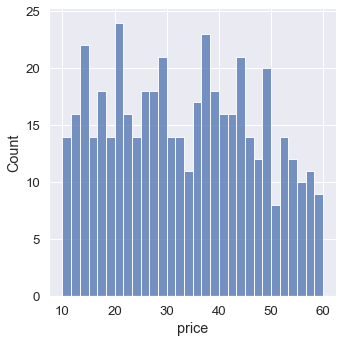

In [40]:
sns.displot(x='price', data=df, bins=30)

<AxesSubplot:xlabel='price', ylabel='Density'>

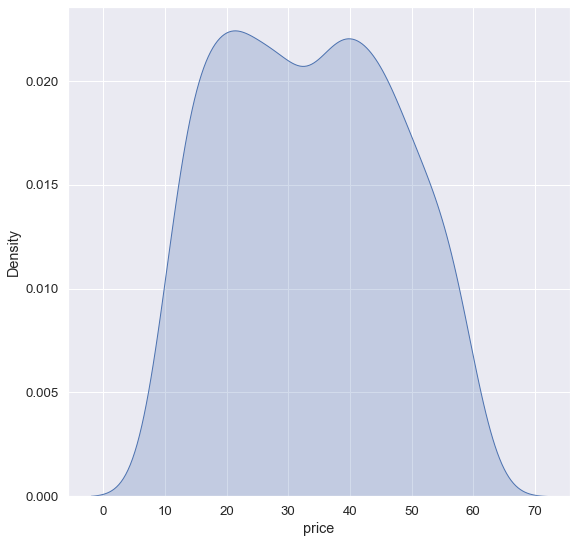

In [42]:
sns.kdeplot(x='price', data=df, shade=True)

**What is the books rate distrubution.**

In [43]:
df['rate'].value_counts()

3    176
5     85
1     78
4     68
2     62
Name: rate, dtype: int64

<AxesSubplot:xlabel='rate', ylabel='count'>

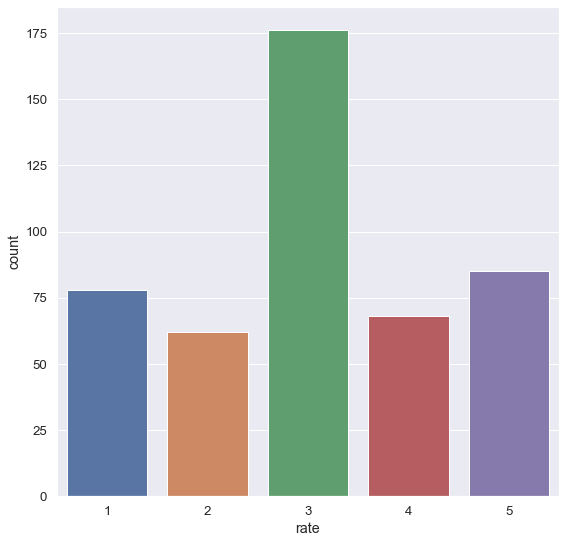

In [64]:
sns.countplot(x='rate', data=df)

**List the books categories sorted ascending.**

In [51]:
df['category'].unique()

array(['Mystery', 'HistoricalFiction', 'SequentialArt', 'Classics',
       'Philosophy', 'Romance', 'WomensFiction', 'Fiction', 'Childrens',
       'Religion', 'Nonfiction', 'Music', 'Default', 'ScienceFiction',
       'SportsandGames', 'Addacomment', 'Fantasy', 'NewAdult',
       'YoungAdult', 'Science', 'Poetry', 'Paranormal', 'Art',
       'Psychology', 'Autobiography', 'Parenting', 'AdultFiction',
       'Humor', 'Horror', 'History', 'FoodandDrink', 'ChristianFiction',
       'Business', 'Biography', 'Thriller', 'Contemporary',
       'Spirituality', 'Academic', 'SelfHelp', 'Historical', 'Christian',
       'Suspense', 'ShortStories', 'Novels', 'Health', 'Politics',
       'Cultural', 'Erotica', 'Crime', 'Programming'], dtype=object)

In [50]:
sorted(df['category'].unique())

['Academic',
 'Addacomment',
 'AdultFiction',
 'Art',
 'Autobiography',
 'Biography',
 'Business',
 'Childrens',
 'Christian',
 'ChristianFiction',
 'Classics',
 'Contemporary',
 'Crime',
 'Cultural',
 'Default',
 'Erotica',
 'Fantasy',
 'Fiction',
 'FoodandDrink',
 'Health',
 'Historical',
 'HistoricalFiction',
 'History',
 'Horror',
 'Humor',
 'Music',
 'Mystery',
 'NewAdult',
 'Nonfiction',
 'Novels',
 'Paranormal',
 'Parenting',
 'Philosophy',
 'Poetry',
 'Politics',
 'Programming',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'ScienceFiction',
 'SelfHelp',
 'SequentialArt',
 'ShortStories',
 'Spirituality',
 'SportsandGames',
 'Suspense',
 'Thriller',
 'WomensFiction',
 'YoungAdult']

In [49]:
df

,title,price,rate,category
0,Sharp Objects,47.82,4,Mystery
1,"In a Dark, Dark Wood",19.63,3,Mystery
2,The Past Never Ends,56.50,4,Mystery
3,A Murder in Time,16.64,3,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,4,Mystery
...,...,...,...,...
464,title-0,20.00,1,Programming
465,title-1,21.00,2,Programming
466,title-2,22.00,3,Programming
467,title-3,23.00,4,Programming


**What is the most expensive book that has rate 5 and what is its category.**

In [53]:
rate_5 = df[  df['rate'] == 5  ]
rate_5.sort_values('price', ascending=False)

,title,price,rate,category
339,Life Without a Recipe,59.04,5,Autobiography
336,Approval Junkie: Adventures in Caring Too Much,58.81,5,Autobiography
288,Immunity: How Elie Metchnikoff Changed the Cou...,57.36,5,Science
296,The Disappearing Spoon: And Other True Tales o...,57.35,5,Science
203,"A Piece of Sky, a Grain of Rice: A Memoir in F...",56.76,5,Default
...,...,...,...,...
33,Voyager (Outlander #3),21.07,5,HistoricalFiction
199,The Inefficiency Assassin: Time Management Tac...,20.59,5,Default
401,Redeeming Love,20.47,5,ChristianFiction
396,Everyday Italian: 125 Simple and Delicious Rec...,20.10,5,FoodandDrink


**How much the store gain from all categories (Travel, Romance, Music).**

In [58]:
trm = df[  df['category'].isin(['Travel', 'Romance', 'Music'])  ]
trm['price'].sum()

919.7899999999998

**List how many books have price between 15 and 30.**

In [61]:
df[  df['price'].between(15, 30)  ].shape[0]

157

**How many books found for each rate for each category.**

In [62]:
books_n = pd.pivot_table(index='category', columns='rate', data=df,
                         values='price', aggfunc='count')
books_n

rate,1,2,3,4,5
category,,,,,
Academic,NaN,NaN,1.0,NaN,NaN
Addacomment,2.0,4.0,4.0,4.0,3.0
AdultFiction,NaN,NaN,1.0,NaN,NaN
Art,NaN,1.0,3.0,3.0,1.0
Autobiography,2.0,NaN,3.0,NaN,3.0
Biography,1.0,1.0,3.0,NaN,NaN
Business,2.0,2.0,4.0,1.0,2.0
Childrens,5.0,2.0,8.0,2.0,2.0
Christian,1.0,1.0,NaN,NaN,1.0


**How much the store gain for each rate for each category.**


In [66]:
books_s = pd.pivot_table(index='category', columns='rate', data=df,
                         values='price', aggfunc=np.sum)
books_s

rate,1,2,3,4,5
category,,,,,
Academic,NaN,NaN,13.12,NaN,NaN
Addacomment,74.98,153.27,102.98,104.17,91.57
AdultFiction,NaN,NaN,15.36,NaN,NaN
Art,NaN,32.34,102.36,133.95,39.51
Autobiography,68.03,NaN,35.71,NaN,172.14
Biography,39.55,21.15,107.61,NaN,NaN
Business,80.05,68.87,95.08,33.34,60.44
Childrens,165.66,56.49,285.81,94.04,69.92
Christian,25.77,47.72,NaN,NaN,54.00


**What are the 5 most expensive books for Art category.**

In [70]:
df[df['category'] == 'Art'].sort_values('price', ascending=False)

,title,price,rate,category
320,Feathers: Displays of Brilliant Plumage,49.05,3,Art
321,Art and Fear: Observations on the Perils (and ...,48.63,4,Art
319,Wall and Piece,44.18,4,Art
322,The New Drawing on the Right Side of the Brain,43.02,3,Art
324,The Story of Art,41.14,4,Art
326,Ways of Seeing,39.51,5,Art
325,The Art Book,32.34,2,Art
323,History of Beauty,10.29,3,Art


**Does the rate affects the price.**

In [71]:
df.corr()

,price,rate
price,1.000000,0.163978
rate,0.163978,1.000000
